## Weather Prediction
In this case study we will use various supervised learning-based models to predict the weather using its own historical data.

### Content

### 1. Problem Definition

### 2. Getting Started- Loading the data and python packages

#### 2.1. Loading the python packages

In [67]:
# Load libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge

#Libraries for Statistical Models
import statsmodels.api as sm

#Libraries for Saving the Model
from pickle import dump
from pickle import load

# Time series Models
from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.statespace.sarimax import SARIMAX

# Error Metrics
from sklearn.metrics import mean_squared_error

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from xgboost import XGBRegressor


#Plotting 
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf

#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

### 2.2. Loading the Data

In [23]:
weather = pd.read_csv("weather.csv", index_col="DATE")

weather.head()


,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT21,WT22,WV01
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,90.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,100.0,NaN,NaN,NaN,0.02,0.0,0.0,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,10.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
weather.shape

(19287, 44)

### 3. Exploratory Data Analysis

#### 3.1. Descriptive Statistics
Lets have a look at the dataset we have

In [25]:
pd.set_option('precision', 3)
weather.describe()

,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT21,WT22,WV01
count,9615.000,9616.000,14171.000,10124.000,12269.000,19287.000,19287.000,19285.000,6164.000,19287.00,...,14.0,2185.0,887.0,42.0,6577.0,60.0,1167.0,5.0,49.0,1.0
mean,57.887,60.666,11.234,1438.506,1383.806,0.118,0.065,0.210,55.555,61.82,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,30.612,33.353,4.792,758.282,631.437,0.331,0.599,1.273,16.567,17.41,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
min,0.000,0.000,0.220,0.000,0.000,0.000,0.000,0.000,8.000,8.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,30.000,30.000,8.280,1101.750,1023.000,0.000,0.000,0.000,43.000,48.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,60.000,70.000,10.510,1526.000,1458.000,0.000,0.000,0.000,56.000,62.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,80.000,90.000,13.420,1850.000,1837.000,0.040,0.000,0.000,71.000,77.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,100.000,100.000,308.030,32767.000,2359.000,7.800,30.300,28.000,91.000,103.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [26]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

STATION    0.000e+00
NAME       0.000e+00
ACMH       5.015e-01
ACSH       5.014e-01
AWND       2.653e-01
FMTM       4.751e-01
PGTM       3.639e-01
PRCP       0.000e+00
SNOW       0.000e+00
SNWD       1.037e-04
TAVG       6.804e-01
TMAX       0.000e+00
TMIN       0.000e+00
TSUN       9.984e-01
WDF1       5.017e-01
WDF2       4.987e-01
WDF5       5.030e-01
WDFG       7.345e-01
WDFM       9.999e-01
WESD       6.852e-01
WSF1       5.015e-01
WSF2       4.987e-01
WSF5       5.030e-01
WSFG       6.131e-01
WSFM       9.999e-01
WT01       6.302e-01
WT02       9.350e-01
WT03       9.333e-01
WT04       9.826e-01
WT05       9.811e-01
WT06       9.906e-01
WT07       9.944e-01
WT08       7.970e-01
WT09       9.927e-01
WT11       9.993e-01
WT13       8.867e-01
WT14       9.540e-01
WT15       9.978e-01
WT16       6.590e-01
WT17       9.969e-01
WT18       9.395e-01
WT21       9.997e-01
WT22       9.975e-01
WV01       9.999e-01
dtype: float64

In [27]:
valid_columns = weather.columns[null_pct < .05]

In [28]:
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [29]:
weather = weather[valid_columns].copy()

In [30]:
weather.columns = weather.columns.str.lower()

In [31]:
weather

,station,name,prcp,snow,snwd,tmax,tmin
DATE,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21
...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43


In [32]:
weather = weather.ffill()

In [33]:
weather.apply(pd.isnull).sum()

station    0
name       0
prcp       0
snow       0
snwd       0
tmax       0
tmin       0
dtype: int64

In [34]:
weather.apply(lambda x: (x == 9999).sum())

station    0
name       0
prcp       0
snow       0
snwd       0
tmax       0
tmin       0
dtype: int64

In [35]:
weather.dtypes

station     object
name        object
prcp       float64
snow       float64
snwd       float64
tmax         int64
tmin         int64
dtype: object

In [36]:
weather.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15', '2022-10-16',
       '2022-10-17', '2022-10-18', '2022-10-19', '2022-10-20', '2022-10-21'],
      dtype='object', name='DATE', length=19287)

In [37]:
weather.index = pd.to_datetime(weather.index)

In [38]:
weather.index.year.value_counts().sort_index()

1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    294
Name: DATE, dtype: int64

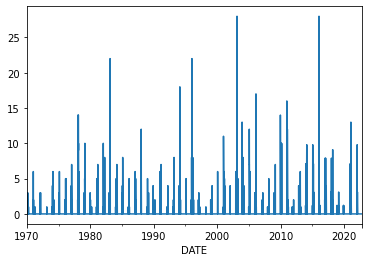

In [39]:
weather["snwd"].plot();

In [40]:
weather["target"] = weather.shift(-1)["tmax"]

In [41]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0
...,...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54,58.0
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48,56.0
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,61.0


In [42]:
weather = weather.ffill()

In [43]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0
...,...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54,58.0
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48,56.0
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,61.0


#### 3.2. Data Visualization
Next, lets look at the distribution of the data over the entire period

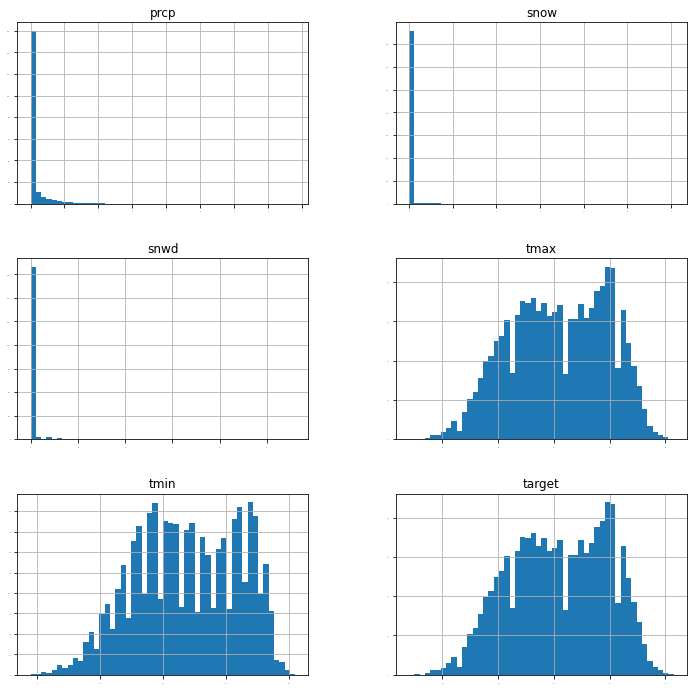

In [44]:
weather.hist(bins=50, sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
pyplot.show()

The above histogram shows the distribution for each series individually. Next, lets look at the density distribution over the same x axis scale.

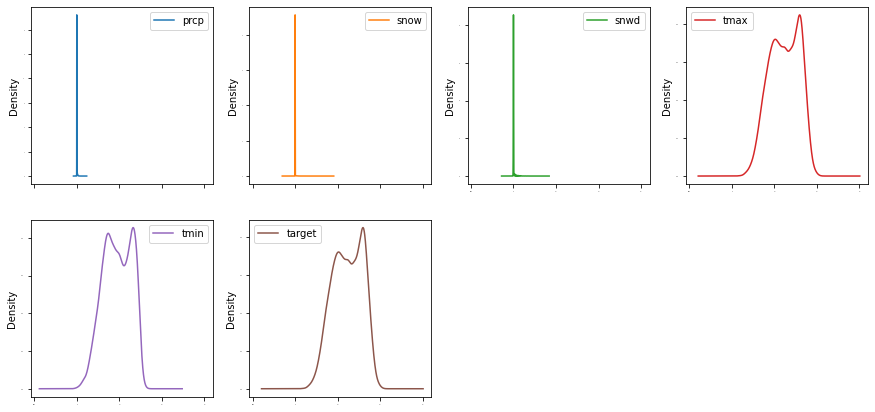

In [45]:
weather.plot(kind='density', subplots=True, layout=(4,4), sharex=True, legend=True, fontsize=1, figsize=(15,15))
pyplot.show()


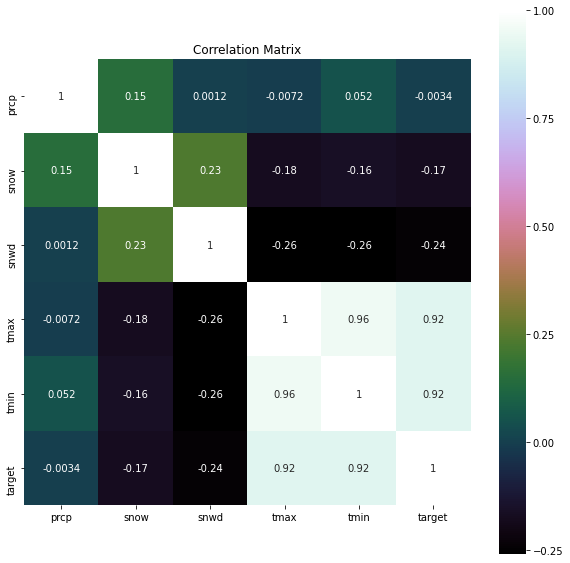

In [49]:
correlation = weather.corr()
pyplot.figure(figsize=(10,10))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix');

<Figure size 1080x1080 with 0 Axes>

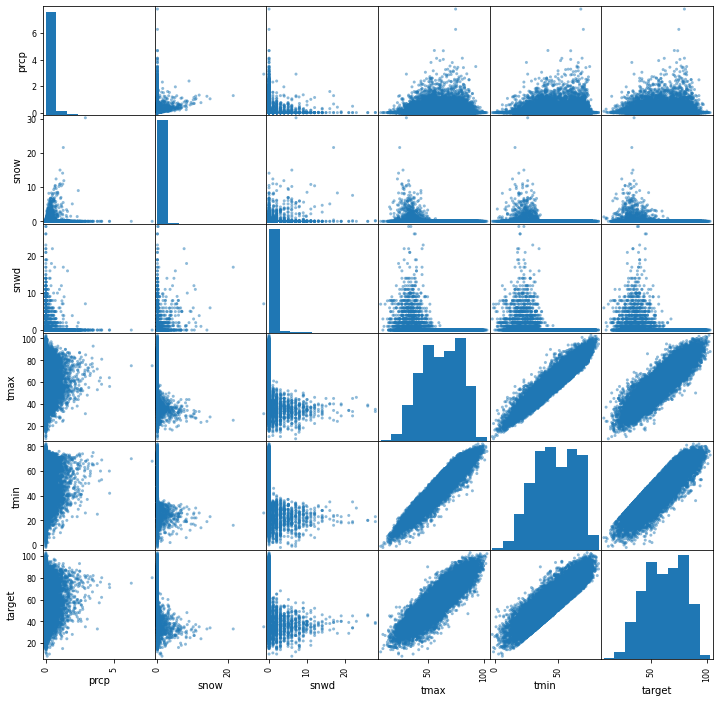

In [50]:
pyplot.figure(figsize=(15,15))
scatter_matrix(weather,figsize=(12,12))
pyplot.show();

In [51]:
X_columns = weather.columns[~weather.columns.isin(["target", "name", "station"])]
X_columns

Index(['prcp', 'snow', 'snwd', 'tmax', 'tmin'], dtype='object')

In [52]:
X = weather[X_columns]
X.head()

,prcp,snow,snwd,tmax,tmin
DATE,,,,,
1970-01-01,0.00,0.0,0.0,28,22
1970-01-02,0.00,0.0,0.0,31,22
1970-01-03,0.02,0.0,0.0,38,25
1970-01-04,0.00,0.0,0.0,31,23
1970-01-05,0.00,0.0,0.0,35,21


In [53]:
Y = weather["target"]
Y.head()

DATE
1970-01-01    31.0
1970-01-02    38.0
1970-01-03    31.0
1970-01-04    35.0
1970-01-05    36.0
Name: target, dtype: float64

#### 3.3. Time Series Analysis
Next, we look at the seasonal decomposition of our time series

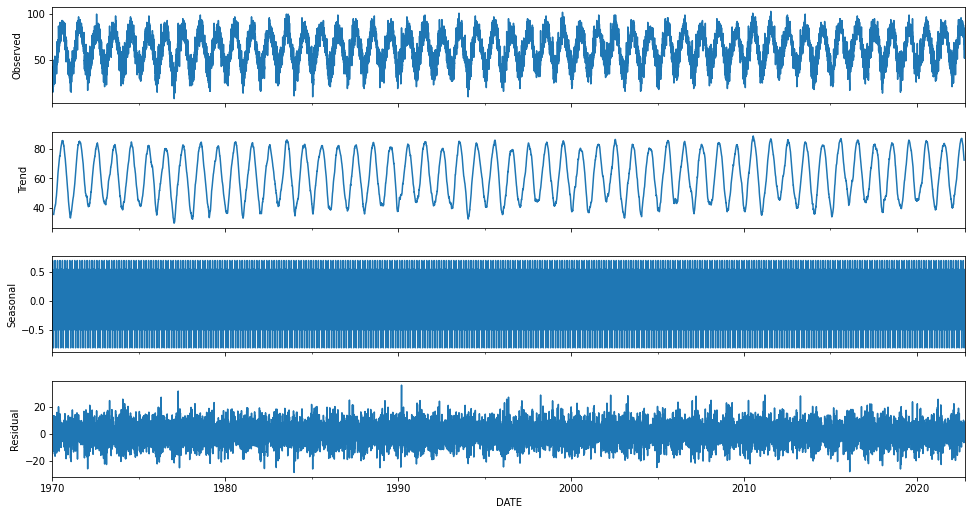

In [56]:
res = sm.tsa.seasonal_decompose(Y,freq=52)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
pyplot.show()

### 4. Data Preparation

#### 4.2. Feature Selection
We use sklearn's SelectKBest function to get a sense of feature importance.

In [57]:
bestfeatures = SelectKBest(k=5, score_func=f_regression)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.nlargest(10,'Score').set_index('Specs')  #print 10 best features

,Score
Specs,
tmin,99808.903
tmax,99586.831
snwd,1189.729
snow,593.124
prcp,0.217


We see that tmin seems to be the most important feature and prcp being the least important

### 5. Evaluate Algorithms and Models

#### 5.1. Train Test Split and Evaluation Metrics
Next, we start by splitting our data in training and testing chunks. If we are going to use Time series models we have to split the data in continous series.

In [58]:
validation_size = 0.2

train_size = int(len(X) * (1-validation_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

#### 5.2. Test Options and Evaluation Metrics

In [59]:
num_folds = 10
seed = 7
# scikit is moving away from mean_squared_error. 
# In order to avoid confusion, and to allow comparison with other models, we invert the final scores
scoring = 'neg_mean_squared_error' 

#### 5.3. Compare Models and Algorithms

##### 5.3.1 Machine Learning models-from scikit-learn

In [68]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))
models.append(('RD', Ridge(alpha=.1)))
models.append(('XGB', XGBRegressor()))

In [69]:
names = []
kfold_results = []
test_results = []
train_results = []
for name, model in models:
    names.append(name)
    
    ## K Fold analysis:
    
    kfold = KFold(n_splits=num_folds)
    #converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    

    # Full Training period
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)
    
    # Test results
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)
    
    msg = "%s: %f (%f) %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(msg)

LR: 42.986547 (1.700465) 42.955179 43.668716
LASSO: 43.226259 (1.715575) 43.209029 43.881118
EN: 43.224345 (1.716128) 43.207375 43.883262
KNN: 49.841029 (1.490931) 37.296742 49.601514
CART: 61.914707 (1.947477) 21.462024 62.596405
SVR: 42.865093 (1.761250) 42.804606 43.402725
ABR: 45.926088 (1.276044) 45.523788 45.581195
GBR: 41.608369 (1.527382) 40.290608 41.778308
RFR: 47.916633 (1.488948) 24.031424 47.456317
ETR: 51.986324 (1.679996) 21.462196 51.405412
RD: 42.986546 (1.700465) 42.955179 43.668711
[12:11:09] WARNING: /usr/local/miniconda/conda-bld/xgboost_1566327371504/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:11:09] WARNING: /usr/local/miniconda/conda-bld/xgboost_1566327371504/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:11:10] WARNING: /usr/local/miniconda/conda-bld/xgboost_1566327371504/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in

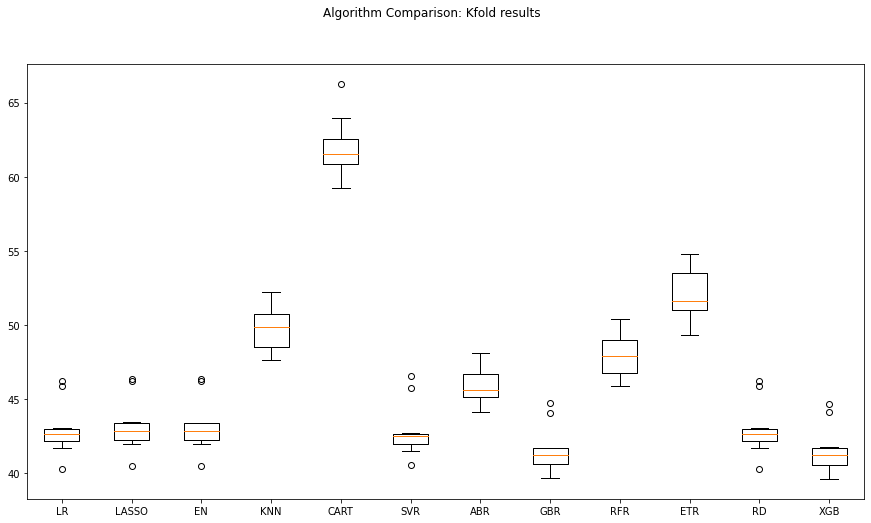

In [70]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

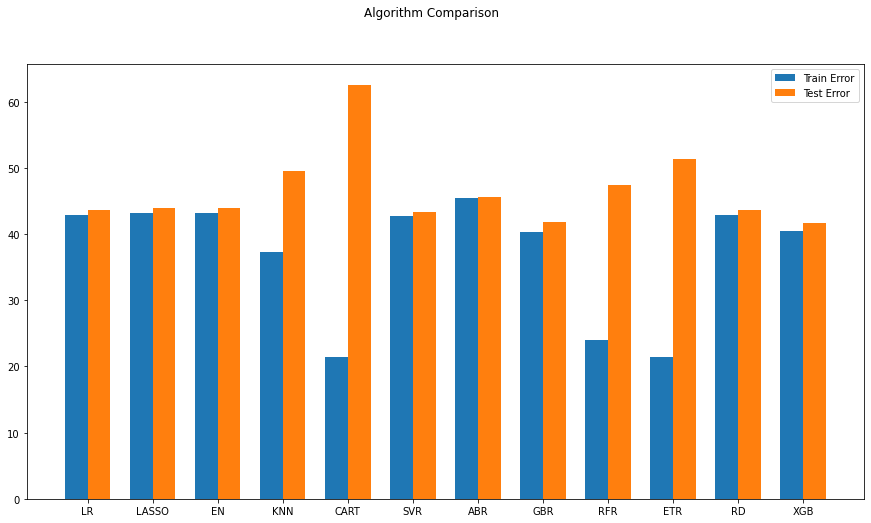

In [71]:
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()

In [72]:
predictors = X_columns

In [73]:
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []
    
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train["target"])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [75]:
rd= Ridge(alpha=.1)

In [76]:
predictions = backtest(weather, rd, predictors)

In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(predictions["actual"], predictions["prediction"])

5.139326679660841

In [84]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
2007-03-26,78.0,49.745,2.826e+01
1999-01-02,53.0,25.912,2.709e+01
1998-03-26,80.0,53.034,2.697e+01
1985-04-18,84.0,57.071,2.693e+01
1990-03-12,85.0,58.144,2.686e+01
...,...,...,...
2006-08-20,88.0,88.003,2.937e-03
2019-03-01,40.0,40.002,2.460e-03
1992-06-11,76.0,76.002,1.641e-03


In [85]:
predictions.head()

,actual,prediction,diff
DATE,,,
1979-12-30,43.0,50.229,7.229
1979-12-31,42.0,43.674,1.674
1980-01-01,41.0,41.579,0.579
1980-01-02,36.0,43.962,7.962
1980-01-03,30.0,40.205,10.205


In [86]:
XGB = XGBRegressor()

In [87]:
predictions_xgb = backtest(weather, XGB, predictors)

[12:45:12] WARNING: /usr/local/miniconda/conda-bld/xgboost_1566327371504/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:45:13] WARNING: /usr/local/miniconda/conda-bld/xgboost_1566327371504/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:45:13] WARNING: /usr/local/miniconda/conda-bld/xgboost_1566327371504/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:45:13] WARNING: /usr/local/miniconda/conda-bld/xgboost_1566327371504/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:45:13] WARNING: /usr/local/miniconda/conda-bld/xgboost_1566327371504/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:45:14] WARNING: /usr/local/miniconda/conda-bld/xgboost_1566327371504/work/src/objective/regression_obj.cu:152: reg:linear is n

In [88]:
mean_absolute_error(predictions_xgb["actual"], predictions_xgb["prediction"])

5.045299210450515

In [89]:
predictions_xgb.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
2007-03-26,78.0,48.490,2.951e+01
1994-01-27,51.0,22.186,2.881e+01
1985-04-18,84.0,56.324,2.768e+01
1998-03-26,80.0,52.838,2.716e+01
1990-03-12,85.0,58.196,2.680e+01
...,...,...,...
2021-02-21,38.0,37.998,2.121e-03
2015-06-14,81.0,81.002,1.945e-03
2021-05-15,70.0,69.998,1.617e-03


In [90]:
predictions_xgb.head()

,actual,prediction,diff
DATE,,,
1979-12-30,43.0,48.855,5.855
1979-12-31,42.0,42.995,0.995
1980-01-01,41.0,42.122,1.122
1980-01-02,36.0,44.962,8.962
1980-01-03,30.0,40.417,10.417
